BAGGING(RandomForest)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
l1=['PassengerId','Cabin','Ticket']
df.drop(l1,inplace=True,axis=1)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
temp=df['Name'].unique()

In [ ]:
type(temp)

numpy.ndarray

In [ ]:
temp[:10]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

In [ ]:
st={}
j=0;
for i in temp:
  print(i)
  j +=1
  if(j==10):
    break

Braund, Mr. Owen Harris
Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Heikkinen, Miss. Laina
Futrelle, Mrs. Jacques Heath (Lily May Peel)
Allen, Mr. William Henry
Moran, Mr. James
McCarthy, Mr. Timothy J
Palsson, Master. Gosta Leonard
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Nasser, Mrs. Nicholas (Adele Achem)


In [ ]:
st=[]
j=0
for i in temp:
  a=i.split(' ')
  for k in a:
    if '.' in k:
      st.append(k)
      break

In [ ]:
st[:10]

['Mr.',
 'Mrs.',
 'Miss.',
 'Mrs.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Master.',
 'Mrs.',
 'Mrs.']

In [ ]:
st=np.array(st)
df['New_name']=st

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,New_name
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.


In [ ]:
df['New_name'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [ ]:
l2=['Name']
df.drop(l2,inplace=True,axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_name
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.


In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
New_name      0
dtype: int64

In [ ]:
emb=list(df['Embarked'].mode())[0]


In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna(emb,inplace=True)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
New_name    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_s=LabelEncoder()
le_e=LabelEncoder()
le_n=LabelEncoder()

In [ ]:
df['Sex']=le_s.fit_transform(df['Sex'])
df['Embarked']=le_e.fit_transform(df['Embarked'])
df['New_name']=le_n.fit_transform(df['New_name'])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_name
0,0,3,1,22.0,1,0,7.2500,2,12
1,1,1,0,38.0,1,0,71.2833,0,13
2,1,3,0,26.0,0,0,7.9250,2,9
3,1,1,0,35.0,1,0,53.1000,2,13
4,0,3,1,35.0,0,0,8.0500,2,12


In [ ]:
df.shape

(891, 9)

In [ ]:
X=df.iloc[:,1:].values
Y=df.iloc[:,0].values

In [ ]:
X.shape,Y.shape

((891, 8), (891,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [ ]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((801, 8), (801,), (90, 8), (90,))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.fit_transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf=RandomForestClassifier(n_estimators=10,n_jobs=-1,max_depth=3)

In [ ]:
clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, n_jobs=-1)

In [ ]:
pred=clf.predict(X_test)

In [ ]:
clf.score(X_train,Y_train)

0.8277153558052435

In [ ]:
clf.score(X_test,Y_test)

0.7666666666666667

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred,Y_test))

[[45 12]
 [ 9 24]]


BOOSTING

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf1=AdaBoostClassifier(n_estimators=50,learning_rate=0.3)

In [ ]:
clf1.fit(X_train,Y_train)

AdaBoostClassifier(learning_rate=0.3)

In [ ]:
pred1=clf1.predict(X_test)

In [ ]:
clf1.score(X_train,Y_train)

0.8289637952559301

In [ ]:
clf1.score(X_test,Y_test)

0.7888888888888889

In [ ]:
print(confusion_matrix(pred,Y_test))

[[45 12]
 [ 9 24]]


XG BOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf3=XGBClassifier(n_estimators=15,n_jobs=-1,learning_rate=0.6)

In [ ]:
clf3.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=15, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
pred2=clf3.predict(X_test)

In [ ]:
clf3.score(X_train,Y_train)

0.9275905118601748

In [ ]:
clf3.score(X_test,Y_test)

0.8

In [ ]:
print(confusion_matrix(pred2,Y_test))

[[48 12]
 [ 6 24]]


EVALUATION

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(confusion_matrix(pred2,Y_test))


[[48 12]
 [ 6 24]]


In [ ]:
print(classification_report(pred2,Y_test))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        60
           1       0.67      0.80      0.73        30

    accuracy                           0.80        90
   macro avg       0.78      0.80      0.78        90
weighted avg       0.81      0.80      0.80        90



KFOLD CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(clf3,X_train,Y_train,cv=3,n_jobs=-1).mean()

0.8314606741573033

GRID SEARCH(FOR HYPER TUNING)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param={
    'learning_rate':[0.1,0.01,0.3,0.5,0.6],
    'max_depth':[1,2,3,4],
    'n+estimators':[5,10,15,20],
}

In [ ]:
clf_grid=GridSearchCV(estimator=clf3,param_grid=param,n_jobs=-1,cv=3)

In [ ]:
clf_grid.fit(X_train,Y_train)

[15:07:28] WARNING: ../src/learner.cc:767: 
Parameters: { "n+estimators" } are not used.



GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.6, m...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=15, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.3, 0.5, 0.6],
                         'max_depth': [1, 2, 3, 4],
                         'n+estimators': [5, 10, 15, 20]})

In [ ]:
clf_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n+estimators=5, n_estimators=15, n_jobs=-1,
              num_parallel_tree=None, predictor=None, ...)

In [ ]:
clf_grid.best_params_

{'learning_rate': 0.5, 'max_depth': 4, 'n+estimators': 5}

In [ ]:
clf_grid.best_score_

0.8352059925093632

Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [ ]:
X_train.shape,Y_train.shape

((801, 8), (801,))

In [ ]:
classifier=Sequential()
# First layer
classifier.add(Dense(units=32,activation='relu',input_shape=(8,)))
classifier.add(Dropout(rate=0.25))

In [ ]:
# Hidden layer
classifier.add(Dense(units=32,activation='relu'))
classifier.add(Dropout(rate=0.25))

In [ ]:
# Output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                288       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.fit(X_train,Y_train,batch_size=64,epochs=50,validation_split=0.1)

Epoch 1/50
12/12 [==============================] - 2s 20ms/step - loss: 0.7244 - accuracy: 0.4764 - val_loss: 0.6716 - val_accuracy: 0.6173
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6653 - accuracy: 0.6458 - val_loss: 0.6436 - val_accuracy: 0.6667
Epoch 3/50
12/12 [==============================] - 0s 8ms/step - loss: 0.6405 - accuracy: 0.7056 - val_loss: 0.6183 - val_accuracy: 0.7284
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.5938 - accuracy: 0.7319 - val_loss: 0.5914 - val_accuracy: 0.7531
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.5609 - accuracy: 0.7500 - val_loss: 0.5712 - val_accuracy: 0.7407
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.5389 - accuracy: 0.7528 - val_loss: 0.5548 - val_accuracy: 0.7407
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 0.5251 - accuracy: 0.7694 - val_loss: 0.5365 - val_accuracy: 0.7654
Epoch 8/50
12/12 [=

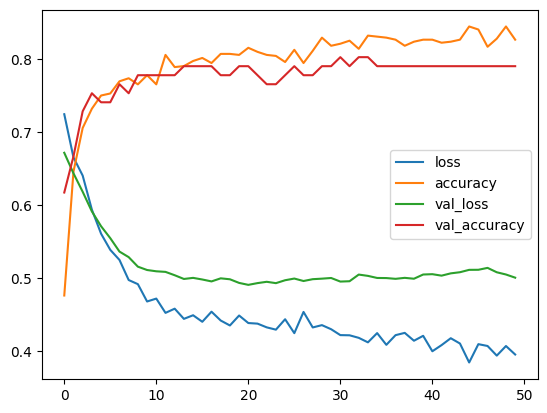

In [ ]:
pd.DataFrame(classifier.history.history).plot()
plt.show()

In [ ]:
classifier.evaluate(X_test,Y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.4655 - accuracy: 0.8111


[0.4654710590839386, 0.8111110925674438]

In [ ]:
y_pred=classifier.predict(X_test)
y_pred=y_pred>=0.5
from sklearn.metrics import confusion_matrix

3/3 [==============================] - 0s 3ms/step


In [ ]:
print(confusion_matrix(y_pred,Y_test))

[[48 14]
 [ 3 25]]


In [ ]:
(54+21)/Y_test.shape[0]

0.8333333333333334